<a href="https://colab.research.google.com/github/sisomimoctrl/study-tensorflow/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**데이터셋 생성하기**

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(f'train_data.shape : {train_data.shape}')
print(f'type(train_data) : {type(train_data)}')
print(f'train_data[0] : {train_data[0]}')

print([len(sequence) for sequence in train_data[0:10]])

print('min : ', min([len(sequence) for sequence in train_data]))
print('max : ', max([len(sequence) for sequence in train_data]))

train_data.shape : (25000,)
type(train_data) : <class 'numpy.ndarray'>
train_data[0] : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [5]:
X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

In [6]:
print(f'train_labels.shape : {train_labels.shape}')
print(f'type(train_labels) : {type(train_labels)}')
print(f'train_labels : {train_labels}')

train_labels.shape : (25000,)
type(train_labels) : <class 'numpy.ndarray'>
train_labels : [1 0 0 ... 0 1 0]


In [7]:
import numpy as np

print(f'train_labels : positive({np.sum(train_labels == 1)}), negative({np.sum(train_labels == 0)})')
print(f'test_labels : positive({np.sum(test_labels == 1)}), negative({np.sum(test_labels == 0)})')

train_labels : positive(12500), negative(12500)
test_labels : positive(12500), negative(12500)


In [8]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

# **모델 구성하기**

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# **모델 학습과정 설정하기**

In [10]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

# **모델 학습시키기**

In [11]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_X_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 41ms/step - loss: 0.5207 - accuracy: 0.7872 - val_loss: 0.3940 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3160 - accuracy: 0.9018 - val_loss: 0.3192 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2326 - accuracy: 0.9263 - val_loss: 0.2809 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1782 - accuracy: 0.9457 - val_loss: 0.2778 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1438 - accuracy: 0.9561 - val_loss: 0.3074 - val_accuracy: 0.8783
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1183 - accuracy: 0.9640 - val_loss: 0.3070 - val_accuracy: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0988 - accuracy: 0.9705 - val_loss: 0.3063 - val_accuracy: 0.8844
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

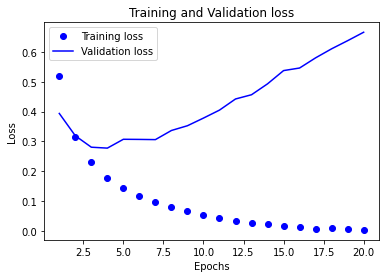

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

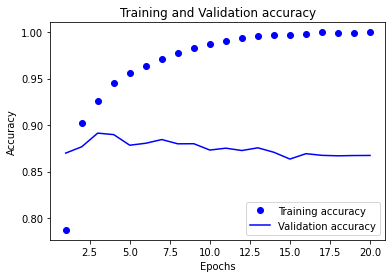

In [15]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **모델 평가하기**

In [16]:
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]} : {scores[1]*100:.2f} %')

782/782 [==============================] - 2s 3ms/step - loss: 0.7274 - accuracy: 0.8538
accuracy : 85.38 %
